In [65]:
from sklearn.datasets import fetch_california_housing


def section(title):
    print("\n" + "="*len(title))
    print(title)
    print("="*len(title))


# ---------------------------
# 1) California Housing (Regression)
# ---------------------------
section("California Housing: EDA → Correlation → Feature Selection → Linear Regression")
cal = fetch_california_housing(as_frame=True)
df = cal.frame.copy()
df.rename(columns={"MedHouseVal": "TARGET_MedHouseVal"}, inplace=True)

section("1) Describing data")
print(f"California Housing: {df.shape[0]} rows, {df.shape[1]} columns")
print(df.head())
print(df.info())

section("2) Cleaning the data")
df2 = df.dropna()
df2["TARGET_MedHouseVal"] *= 100_000
print(f"Columns reduced {df.shape[1]-df2.shape[1]}\nRows reduced {df.shape[0]-df2.shape[0]}")




California Housing: EDA → Correlation → Feature Selection → Linear Regression

1) Describing data
California Housing: 20640 rows, 9 columns
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  TARGET_MedHouseVal  
0    -122.23               4.526  
1    -122.22               3.585  
2    -122.24               3.521  
3    -122.25               3.413  
4    -122.25               3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              ----------


3) Vsualising the data


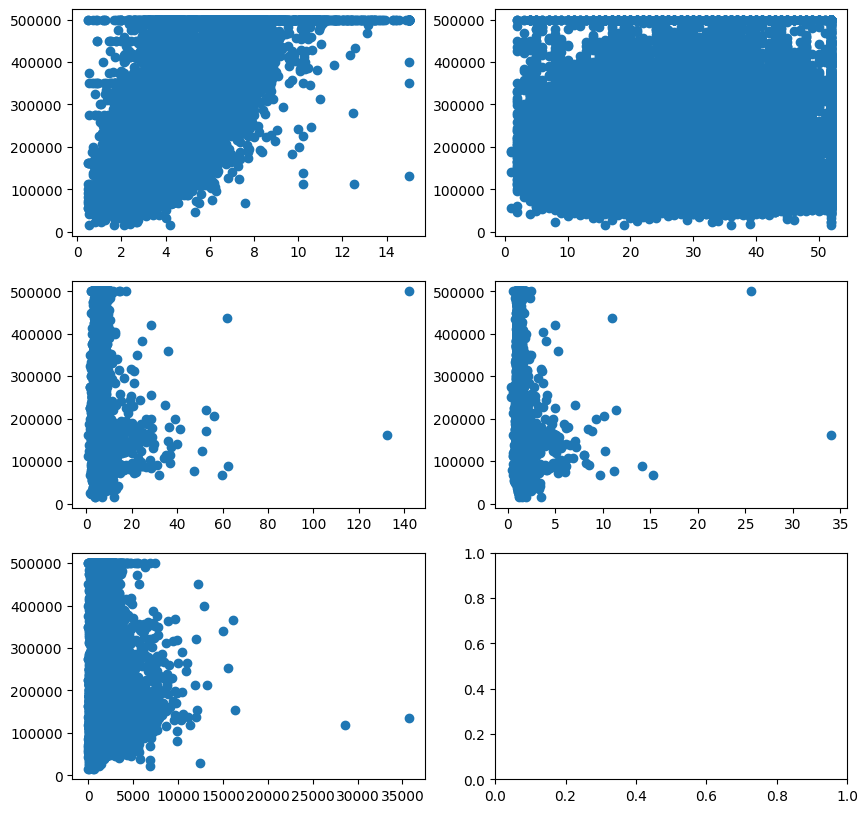

In [35]:
section("3) Vsualising the data")
import matplotlib.pyplot as plot
fig, axis = plot.subplots(3,2, figsize=(10,10))

# MedInc
axis[0,0].scatter(df2["MedInc"], df2["TARGET_MedHouseVal"])

# HouseAge
axis[0,1].scatter(df2["HouseAge"], df2["TARGET_MedHouseVal"])

# AveRooms
axis[1,0].scatter(df2["AveRooms"], df2["TARGET_MedHouseVal"])

# AveBedrms
axis[1,1].scatter(df2["AveBedrms"], df2["TARGET_MedHouseVal"])

# Population
axis[2,0].scatter(df2["Population"], df2["TARGET_MedHouseVal"])


<class 'pandas.core.frame.DataFrame'>
                      MedInc  HouseAge  AveRooms  AveBedrms  Population  \
MedInc              1.000000 -0.119034  0.326895  -0.062040    0.004834   
HouseAge           -0.119034  1.000000 -0.153277  -0.077747   -0.296244   
AveRooms            0.326895 -0.153277  1.000000   0.847621   -0.072213   
AveBedrms          -0.062040 -0.077747  0.847621   1.000000   -0.066197   
Population          0.004834 -0.296244 -0.072213  -0.066197    1.000000   
AveOccup            0.018766  0.013191 -0.004852  -0.006181    0.069863   
Latitude           -0.079809  0.011173  0.106389   0.069721   -0.108785   
Longitude          -0.015176 -0.108197 -0.027540   0.013344    0.099773   
TARGET_MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650   

                    AveOccup  Latitude  Longitude  TARGET_MedHouseVal  
MedInc              0.018766 -0.079809  -0.015176            0.688075  
HouseAge            0.013191  0.011173  -0.108197            0.1056

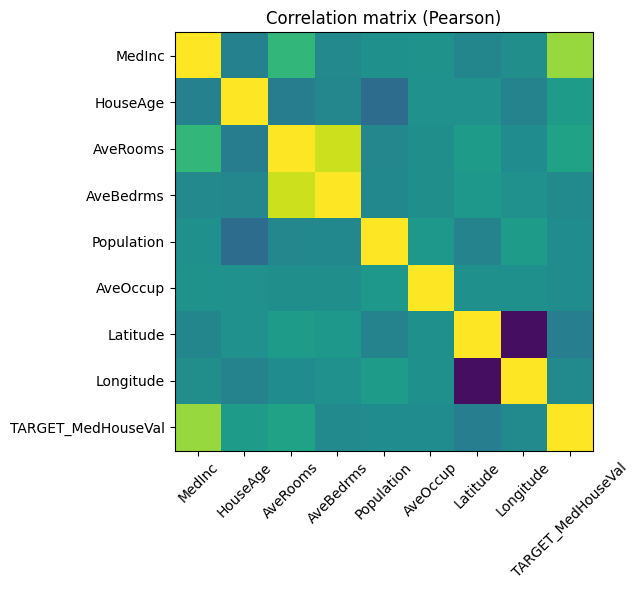

In [64]:
import numpy as np
num_cols = df2.columns
corr = df2.corr()
print(type(corr))
print(corr[:10])
fig, ax = plot.subplots(figsize=(8, 6))
im = ax.imshow(corr, vmin=-1, vmax=1)   # don't set colors; use defaults
ax.set_xticks(np.arange(len(num_cols)))
ax.set_yticks(np.arange(len(num_cols)))
ax.set_xticklabels(num_cols, rotation=45)
ax.set_yticklabels(num_cols)
# fig.colorbar(im, ax=ax)
ax.set_title("Correlation matrix (Pearson)")
fig.tight_layout()
# fig.savefig("corre_graph.jpg")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [67]:
!pip install xlrd

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

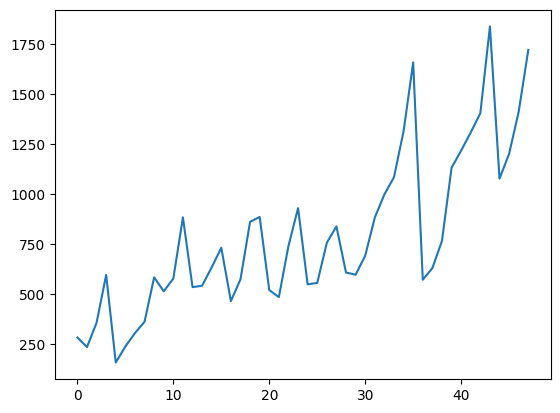

In [100]:
import pandas as pd
df = pd.read_excel("/Users/kamalmukiri/Downloads/Sample - Superstore.xls")
print(df.info())
# Function to get month from a date
def Function_get_month(inpDate):
    return(inpDate.month)
 
# Function to get Year from a date
def Function_get_year(inpDate):
    return(inpDate.year)

df["Year"] = df["Order Date"].apply(Function_get_year)
df["Month"] = df["Order Date"].apply(Function_get_month)
df2 = pd.crosstab(columns=df['Month'],
            index=df['Year'],
            values=df['Quantity'],
            aggfunc='sum')

print(df2)

df3 = df2.melt()
print(df3)
plot.plot(np.arange(48), df3["value"])

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_excel("/Users/kamalmukiri/Downloads/Sample - Superstore.xls")
# Function to get month from a date
def Function_get_month(inpDate):
    return(inpDate.month)
 
# Function to get Year from a date
def Function_get_year(inpDate):
    return(inpDate.year)

df["Year"] = df["Order Date"].apply(Function_get_year)
df["Month"] = df["Order Date"].apply(Function_get_month)
# Convert categorical columns to numeric (e.g., one-hot encoding)
df_encoded = pd.get_dummies(df, columns=['Category', 'Region', 'Segment'], drop_first=True)
# Features and target (e.g., predict Sales for better continuity)
features = ['Year', 'Month', 'Discount', 'Quantity'] + [col for col in df_encoded.columns if col.startswith(('Category_', 'Region_', 'Segment_'))]
print(features)
X = df_encoded[features]
y = df_encoded['Sales']  # Or 'Quantity' if preferred

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: ${rmse:.2f} (Sales)")
print("Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.2f}")

# Predict new data
new_data = pd.DataFrame({
    'Year': [2018],
    'Month': [12],
    'Discount': [0.2],
    'Quantity': [5],
    'Category_Office Supplies': [1],  # Example: Office Supplies
    'Category_Technology': [0],
    'Region_East': [0],
    'Region_South': [0],
    'Region_West': [1],  # Example: West
    'Segment_Consumer': [1],  # Example: Consumer
    'Segment_Corporate': [0],
    'Segment_Home Office': [0]
}, columns=features)  # Match feature order
prediction = model.predict(new_data)
print(f"Predicted Sales for new data: ${prediction[0]:.2f}")

['Year', 'Month', 'Discount', 'Quantity', 'Category_Office Supplies', 'Category_Technology', 'Region_East', 'Region_South', 'Region_West', 'Segment_Corporate', 'Segment_Home Office']
RMSE: $737.23 (Sales)
Coefficients:
Year: -0.74
Month: -0.06
Discount: -119.34
Quantity: 53.04
Category_Office Supplies: -229.39
Category_Technology: 86.09
Region_East: 4.08
Region_South: -13.08
Region_West: -19.36
Segment_Corporate: -0.93
Segment_Home Office: 2.90
Predicted Sales for new data: $163.61


In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare data
X = df[['Year', 'Month']]
y = df['Quantity']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f} units (Quantity)")
print(f"Coefficients: Year={model.coef_[0]:.2f}, Month={model.coef_[1]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

# Predict new data
new_data = pd.DataFrame({
    'Year': [2018, 2018],
    'Month': [1, 12]
})
predictions = model.predict(new_data)
print("\nPredictions for new data:")
for year, month, pred in zip(new_data['Year'], new_data['Month'], predictions):
    print(f"Year {year}, Month {month}: Predicted Quantity = {pred:.0f}")

RMSE: 2.25 units (Quantity)
Coefficients: Year=0.00, Month=0.02
Intercept: 1.14

Predictions for new data:
Year 2018, Month 1: Predicted Quantity = 4
Year 2018, Month 12: Predicted Quantity = 4
